In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
import pandas as pd

# Load the data
regular_season = pd.read_csv("Consolidated Regular Season Data.csv")
playoffs = pd.read_csv("Consolidated Playoffs - Sheet1.csv")

# Remove asterisks from the team names in the regular season data
regular_season['Team'] = regular_season['Team'].str.replace('*', '', regex=False)

# Ensure data types are consistent for merging
playoffs['Year'] = playoffs['Year'].astype(int)
regular_season['Season (end)'] = regular_season['Season (end)'].astype(int)

In [3]:
# Merge regular season data with playoffs data for losers
merged = pd.merge(regular_season, playoffs, left_on=['Season (end)', 'Team'], right_on=['Year', 'Loser'], how='left')
merged['Lost To'] = merged['Winner']
merged['Year'] = merged['Season (end)']
merged['Round made it to'] = merged['Playoff Round']
merged.drop(columns=['Season (end)', 'Playoff Round', 'Winner', 'Loser'], inplace=True)

merged

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%.1,DRB%,FT/FGA.1,Successful,Arena,Attend.,Attend./G,Year,Lost To,Round made it to
0,1,Miami Heat,29.0,58,24,61,21,7.46,-0.71,6.76,...,12.6,75.5,0.223,1,AmericanAirlines Arena,"810,930","19,779",2011,Dallas Mavericks,Finals
1,2,Chicago Bulls,26.4,62,20,61,21,7.32,-0.79,6.53,...,13.6,76.2,0.222,1,United Center,"893,462","21,792",2011,Miami Heat,Eastern Conference Finals
2,3,Los Angeles Lakers,30.2,57,25,58,24,6.11,-0.10,6.01,...,12.8,72.3,0.181,0,STAPLES Center,"778,877","18,997",2011,Dallas Mavericks,Western Conference Semifinals
3,4,San Antonio Spurs,28.8,61,21,56,26,5.71,0.16,5.86,...,12.6,74.6,0.190,0,AT&T Center,"750,879","18,314",2011,Memphis Grizzlies,Western Conference First Round
4,5,Boston Celtics,29.5,56,26,57,25,5.37,-0.54,4.83,...,14.8,74.7,0.235,0,TD Garden,"763,584","18,624",2011,Miami Heat,Eastern Conference Semifinals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,26,Portland Trail Blazers,25.1,33,49,31,51,-4.01,0.05,-3.96,...,12.1,74.9,0.217,0,Moda Center,"767,374","18,716",2023,NaN,NaN
386,27,Charlotte Hornets,25.3,27,55,26,56,-6.24,0.35,-5.89,...,12.5,75.5,0.211,0,Spectrum Center,"702,052","17,123",2023,NaN,NaN
387,28,Houston Rockets,22.1,22,60,23,59,-7.85,0.24,-7.62,...,11.8,75.8,0.218,0,Toyota Center,"668,865","16,314",2023,NaN,NaN
388,29,Detroit Pistons,24.1,17,65,22,60,-8.22,0.49,-7.73,...,11.9,74.0,0.231,0,Little Caesars Arena,"759,715","18,596",2023,NaN,NaN


In [4]:
# For winners, especially for identifying NBA Champions
winners = playoffs[playoffs['Playoff Round'] == 'Finals'][['Winner', 'Year']]
winners['Round made it to'] = 'NBA Champion'
winners.rename(columns={'Winner': 'Team'}, inplace=True)

winners

,Team,Year,Round made it to
0,Denver Nuggets,2023,NBA Champion
15,Golden State Warriors,2022,NBA Champion
30,Milwaukee Bucks,2021,NBA Champion
45,Los Angeles Lakers,2020,NBA Champion
60,Toronto Raptors,2019,NBA Champion
75,Golden State Warriors,2018,NBA Champion
90,Golden State Warriors,2017,NBA Champion
105,Cleveland Cavaliers,2016,NBA Champion
120,Golden State Warriors,2015,NBA Champion
135,San Antonio Spurs,2014,NBA Champion


In [5]:
merged.set_index(['Team', 'Year'], inplace=True)
winners.set_index(['Team', 'Year'], inplace=True)

# Update 'Round made it to' for matching index entries in 'merged' using 'winners'
merged.loc[merged.index.isin(winners.index), 'Round made it to'] = 'NBA Champion'

# Reset the index to revert back to the standard dataframe format
merged.reset_index(inplace=True)

merged["Round made it to"] = merged["Round made it to"].str.replace('Western ', '', regex=False)
merged["Round made it to"] = merged["Round made it to"].str.replace('Eastern ', '', regex=False)

# Now, the 'merged' dataframe will reflect 'NBA Champion' in the 'Round made it to' column for the winners
merged.to_csv('NBA_Total_Season_Data.csv', index=False)

merged[merged["Round made it to"] == "NBA Champion"]

,Team,Year,Rk,Age,W,L,PW,PL,MOV,SOS,...,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Successful,Arena,Attend.,Attend./G,Lost To,Round made it to
7,Dallas Mavericks,2011,8,30.9,57,25,53,29,4.23,0.18,...,0.488,13.0,74.8,0.206,1,American Airlines Center,"824,162","20,102",NaN,NBA Champion
33,Miami Heat,2012,4,28.3,46,20,47,19,5.98,-0.27,...,0.479,15.8,73.9,0.200,1,AmericanAirlines Arena,"657,855","19,935",NaN,NBA Champion
61,Miami Heat,2013,2,30.3,66,16,62,20,7.87,-0.84,...,0.487,14.8,73.0,0.200,1,AmericanAirlines Arena,"819,290","19,983",NaN,NBA Champion
90,San Antonio Spurs,2014,1,28.9,62,20,61,21,7.72,0.28,...,0.482,12.8,76.4,0.184,1,AT&T Center,"755,031","18,415",NaN,NBA Champion
120,Golden State Warriors,2015,1,26.6,67,15,65,17,10.10,-0.09,...,0.470,14.3,74.5,0.217,1,Oracle Arena,"803,436","19,596",NaN,NBA Champion
153,Cleveland Cavaliers,2016,4,28.1,57,25,57,25,6.00,-0.55,...,0.496,12.6,78.5,0.205,1,Quicken Loans Arena,"843,042","20,562",NaN,NBA Champion
180,Golden State Warriors,2017,1,28.2,67,15,67,15,11.63,-0.28,...,0.486,13.5,74.9,0.198,1,Oracle Arena,"803,436","19,596",NaN,NBA Champion
212,Golden State Warriors,2018,3,28.8,58,24,56,26,5.98,-0.19,...,0.504,12.6,76.3,0.186,1,Oracle Arena,"803,436","19,596",NaN,NBA Champion
242,Toronto Raptors,2019,3,27.3,58,24,56,26,6.09,-0.60,...,0.509,13.1,77.1,0.190,1,Scotiabank Arena,"812,822","19,825",NaN,NBA Champion
274,Los Angeles Lakers,2020,5,29.5,52,19,48,23,5.79,0.49,...,0.515,14.1,78.8,0.205,1,STAPLES Center,"588,907","18,997",NaN,NBA Champion


In [6]:
merged

,Team,Year,Rk,Age,W,L,PW,PL,MOV,SOS,...,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Successful,Arena,Attend.,Attend./G,Lost To,Round made it to
0,Miami Heat,2011,1,29.0,58,24,61,21,7.46,-0.71,...,0.475,12.6,75.5,0.223,1,AmericanAirlines Arena,"810,930","19,779",Dallas Mavericks,Finals
1,Chicago Bulls,2011,2,26.4,62,20,61,21,7.32,-0.79,...,0.463,13.6,76.2,0.222,1,United Center,"893,462","21,792",Miami Heat,Conference Finals
2,Los Angeles Lakers,2011,3,30.2,57,25,58,24,6.11,-0.10,...,0.477,12.8,72.3,0.181,0,STAPLES Center,"778,877","18,997",Dallas Mavericks,Conference Semifinals
3,San Antonio Spurs,2011,4,28.8,61,21,56,26,5.71,0.16,...,0.491,12.6,74.6,0.190,0,AT&T Center,"750,879","18,314",Memphis Grizzlies,Conference First Round
4,Boston Celtics,2011,5,29.5,56,26,57,25,5.37,-0.54,...,0.469,14.8,74.7,0.235,0,TD Garden,"763,584","18,624",Miami Heat,Conference Semifinals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,Portland Trail Blazers,2023,26,25.1,33,49,31,51,-4.01,0.05,...,0.563,12.1,74.9,0.217,0,Moda Center,"767,374","18,716",NaN,NaN
386,Charlotte Hornets,2023,27,25.3,27,55,26,56,-6.24,0.35,...,0.544,12.5,75.5,0.211,0,Spectrum Center,"702,052","17,123",NaN,NaN
387,Houston Rockets,2023,28,22.1,22,60,23,59,-7.85,0.24,...,0.564,11.8,75.8,0.218,0,Toyota Center,"668,865","16,314",NaN,NaN
388,Detroit Pistons,2023,29,24.1,17,65,22,60,-8.22,0.49,...,0.557,11.9,74.0,0.231,0,Little Caesars Arena,"759,715","18,596",NaN,NaN


In [7]:
lost_to_data = merged.copy()
lost_to_data.rename(columns={col: f'Lost to {col}' for col in merged.columns if col not in ['Team', 'Year']}, inplace=True)

final_merged = pd.merge(merged, lost_to_data, left_on=['Lost To', 'Year'], right_on=['Team', 'Year'], how='left')

final_merged.to_csv('NBA_Data_and_team_lost_to.csv', index=False)

final_merged["Difference NRtg"] = final_merged["Lost to NRtg"] - final_merged["NRtg"]

final_merged["Difference W"] = final_merged["Lost to W"] - final_merged["W"]

final_merged.drop(columns=['Lost to Lost To'], inplace=True)

final_merged.columns


Index(['Team_x', 'Year', 'Rk', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'Playoffs', 'eFG%.1', 'TOV%.1', 'DRB%',
       'FT/FGA.1', 'Successful', 'Arena', 'Attend.', 'Attend./G', 'Lost To',
       'Round made it to', 'Team_y', 'Lost to Rk', 'Lost to Age', 'Lost to W',
       'Lost to L', 'Lost to PW', 'Lost to PL', 'Lost to MOV', 'Lost to SOS',
       'Lost to SRS', 'Lost to ORtg', 'Lost to DRtg', 'Lost to NRtg',
       'Lost to Pace', 'Lost to FTr', 'Lost to 3PAr', 'Lost to TS%',
       'Lost to eFG%', 'Lost to TOV%', 'Lost to ORB%', 'Lost to FT/FGA',
       'Lost to Playoffs', 'Lost to eFG%.1', 'Lost to TOV%.1', 'Lost to DRB%',
       'Lost to FT/FGA.1', 'Lost to Successful', 'Lost to Arena',
       'Lost to Attend.', 'Lost to Attend./G', 'Lost to Round made it to',
       'Difference NRtg', 'Difference W'],
      dtype='object')

/var/folders/7h/bksj28b12n9gw611klbwdr3h0000gn/T/ipykernel_80878/3709128974.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  netdiff = sns.catplot(data=final_merged[pd.notna(final_merged['Lost To'])], x = "Round made it to", y = "Difference NRtg", kind="bar",
/Users/dilloncallen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


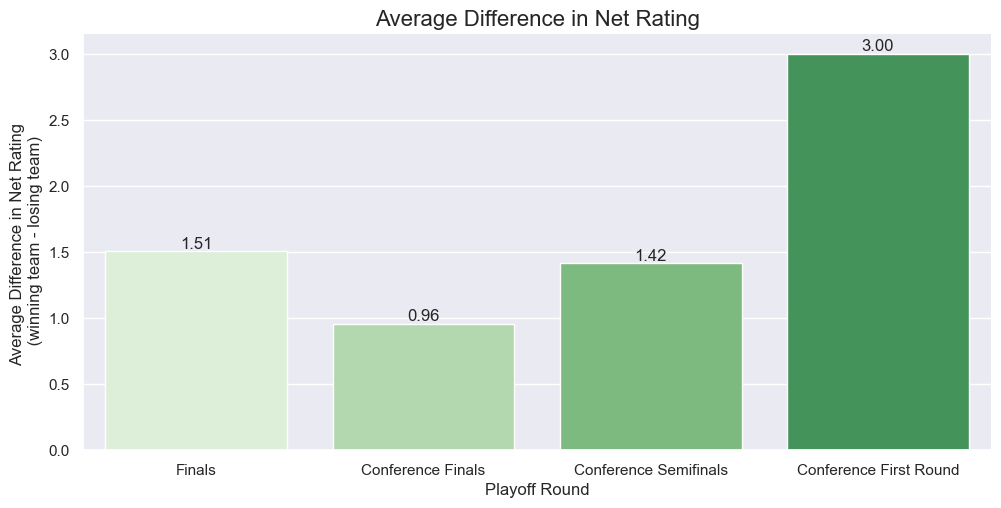

In [8]:
green_palette = sns.color_palette("Greens", n_colors = final_merged['Round made it to'].nunique())

netdiff = sns.catplot(data=final_merged[pd.notna(final_merged['Lost To'])], x = "Round made it to", y = "Difference NRtg", kind="bar", 
                      aspect=2, ci=None, palette = green_palette)
plt.xticks(rotation=0)
plt.title('Average Difference in Net Rating', fontsize=16)
plt.xlabel('Playoff Round')  # X-axis label
plt.ylabel('Average Difference in Net Rating \n (winning team - losing team)')  # Y-axis label

ax = netdiff.ax  # Get the facet grid's axes for easier manipulation
for p in ax.patches:  # Loop through each rectangle in the bar plot
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
            ha='center', va='bottom')  # Place the text at the top center of the bar

# Show the plot
plt.show()


/var/folders/7h/bksj28b12n9gw611klbwdr3h0000gn/T/ipykernel_80878/2316375550.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  netdiff = sns.catplot(data=final_merged[pd.notna(final_merged['Lost To'])], x = "Round made it to", y = "Difference W", kind="bar",
/Users/dilloncallen/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


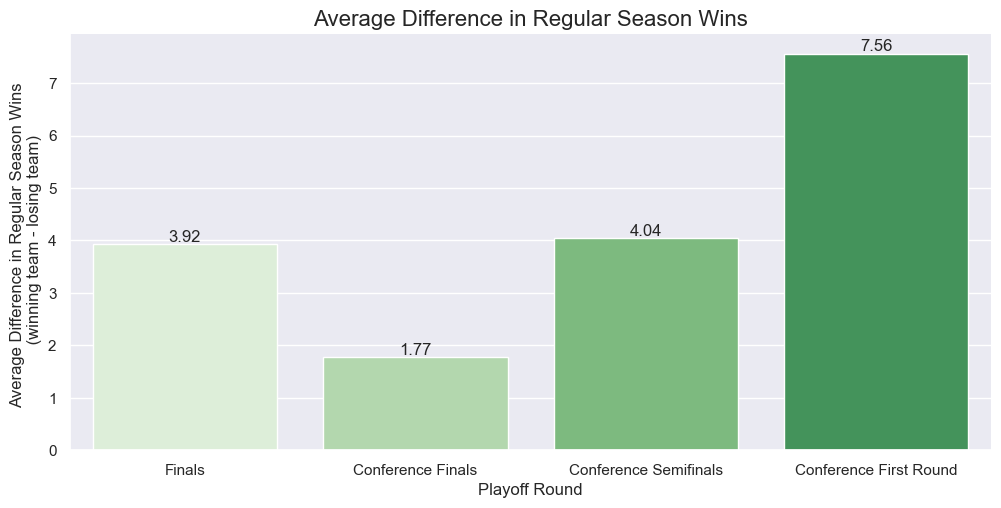

In [9]:
green_palette = sns.color_palette("Greens", n_colors = final_merged['Round made it to'].nunique())

netdiff = sns.catplot(data=final_merged[pd.notna(final_merged['Lost To'])], x = "Round made it to", y = "Difference W", kind="bar", 
                      aspect=2, ci=None, palette = green_palette)
plt.xticks(rotation=0)
plt.title('Average Difference in Regular Season Wins', fontsize=16)
plt.xlabel('Playoff Round')  # X-axis label
plt.ylabel('Average Difference in Regular Season Wins \n (winning team - losing team)')  # Y-axis label

ax = netdiff.ax  # Get the facet grid's axes for easier manipulation
for p in ax.patches:  # Loop through each rectangle in the bar plot
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
            ha='center', va='bottom')  # Place the text at the top center of the bar

# Show the plot
plt.show()